In [2]:
import numpy as np
import scipy as sp
from PIL import Image

import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D

import scipy.stats as st
from sortedcontainers import SortedDict
from skimage.restoration import unwrap_phase

from IPython.display import HTML

import math
import random
import opticspy as opy

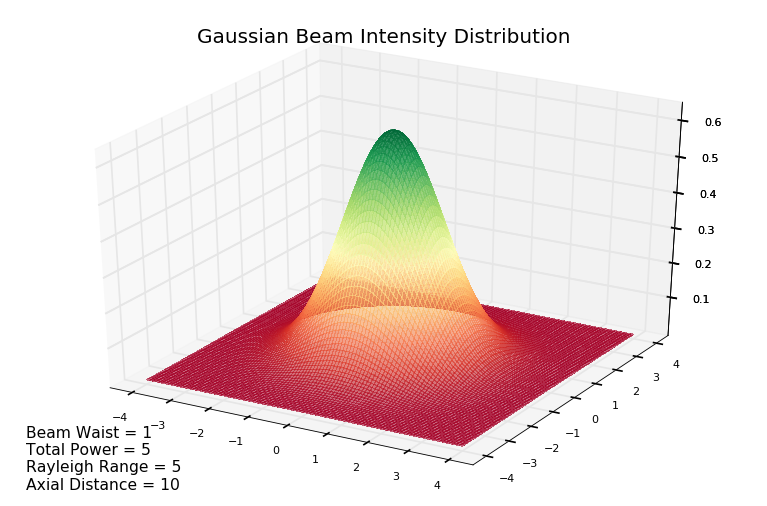

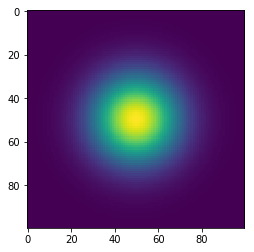

In [3]:
g2 = opy.gauss.gaussbeam(w0=1, P=5, z0=5, z=10)
plt.imshow(g2)

In [4]:
nz = 10 # number of steps
dz = 10 # step size (microns)

M       = 1000                # Grid points in microns
size_x  = 1024                # Step size in micron 
size_y  = 1024                # Step size in micron
wavelength   = 0.6283              # Wavelength of laser, micron
z       = 10                  # Distance in micron for beam input onto aperture
w       = 100                 # beam waist (radius) microns
zmax    = 1000                # (pi*4.7^2)/lambda;    % Distance in micron for beam propagating after lens
c1      = 4                   # Topological charge
f       = 500                 # effective focal length of lens, microns
#P       = lbmda/4             # pitch

z2 = 0 

#x,y,dz,CC1,amp1,G1,M,w,amp,mask

#CC1 = amp.*mask.*lens

In [5]:
def get_kernel(wavelength,z,dx,dy,x,y):
    kernelFactor = 2*math.pi*z/wavelength
    
    dfx = 1/(dx*x)
    dfy = 1/(dy*y)
    
    # Count up then down eg: [0,1,2,1,0]
    if x % 2 == 0:
        x2 = np.append(np.arange(x/2),np.flip(np.arange(x/2)))
    else:
        x2 = np.append(np.arange((x/2)-1),[math.ceil(x/2)])
        x2 = np.append(x2,np.flip(np.arange((x/2)-1)))
        
    if y % 2 == 0:
        y2 = np.append(np.arange(y/2),np.flip(np.arange(y/2)))
    else:
        y2 = np.append(np.arange((y/2)-1),[math.ceil(y/2)])
        y2 = np.append(y2,np.flip(np.arange((y/2)-1)))
    
    l = x2 - (x/2) + 1
    l2 = (l**2) * (dfx**2)
    
    m = y2 - (y/2) + 1
    m2 = (m**2) * (dfy**2) + 1
    
    l3 = np.broadcast_to(l2, (y,x)).transpose()
    m3 = np.broadcast_to(m2, (x,y))
    
    kernelPhase = np.power(1 - ((l3+m3) * (wavelength**2)),(1/2)) * kernelFactor
    
    real = np.cos(kernelPhase)
    img = 1j*np.sin(kernelPhase)
    
    return real+img

In [6]:
def get_kernel(wavelength,z,dx,dy,x,y):
    kernelFactor = 2*math.pi*z/wavelength
    
    dfx = 1/(dx*x)
    dfy = 1/(dy*y)
    
    # Count up then down eg: [0,1,2,1,0]
    if x % 2 == 0:
        x2 = np.append(np.arange(x/2),np.flip(np.arange(x/2)))
    else:
        x2 = np.append(np.arange((x/2)-1),[math.ceil(x/2)])
        x2 = np.append(x2,np.flip(np.arange((x/2)-1)))
        
    if y % 2 == 0:
        y2 = np.append(np.arange(y/2),np.flip(np.arange(y/2)))
    else:
        y2 = np.append(np.arange((y/2)-1),[math.ceil(y/2)])
        y2 = np.append(y2,np.flip(np.arange((y/2)-1)))
    
    l = x2 - (x/2) + 1
    l2 = (l**2) * (dfx**2)
    
    m = y2 - (y/2) + 1
    m2 = (m**2) * (dfy**2) + 1
    
    l2 = np.arange(x)-int(x/2)
    m2 = np.arange(y)-int(y/2)
    
    l3 = np.broadcast_to(l2, (y,x)).transpose()
    m3 = np.broadcast_to(m2, (x,y))
    
    #print(l3)
    #print(m3)
    
    kernelPhase = np.power(1 - (wavelength*l3/dx)**2 - (wavelength*m3/dy)**2,(1/2)) * kernelFactor
    
    real = np.cos(kernelPhase)
    img = 1j*np.sin(kernelPhase)
    
    return real+img

In [5]:
for i in range(200):
    propogator = get_kernel(wavelength, i, 200, 200, x,y)
    propogated = np.abs(np.fft.ifft2(np.fft.fftshift((np.multiply(np.fft.fftshift(np.fft.fft2(np.ones(propogator.shape))),propogator)))))
    propogated = np.abs((np.multiply(np.ones(propogator.shape),propogator)))

    #plt.imsave(f'I:\\Honours-Project\\data\\40x 0_70NA\\reference arm\\cropped\\phase\\ones\\{i}.png',np.angle(propogated))

NameError: name 'x' is not defined

In [40]:
propogator = get_kernel(wavelength, 500, 100, 100, x,y)
propogated = np.abs(np.fft.ifft2(np.fft.fftshift((np.multiply(np.fft.fftshift(np.fft.fft2(img)),propogator)))))
propogated = np.angle((np.multiply(np.ones(propogator.shape),propogator)))
#plt.imshow(np.abs(np.log(np.fft.fftshift(np.fft.fft2(img)))))
#print(propogator)
#plt.imshow(np.angle(np.fft.ifft2(np.fft.fftshift(propogator))))
plt.imshow(propogated)
propogated

C:\Users\Duo\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in power


NameError: name 'img' is not defined

In [134]:
img = np.asarray(Image.open('data\\40x 0_70NA\\cropped\\no_diffuser_1_1.TIF'))
img = np.load("I:\\Honours-Project\\data\\simulation\\clean_hologram\\bead_march\\clean_bead_3.npy")
#plt.imshow(img)

x,y = img.shape

#propogator = get_kernel(wavelength, 100, 4.24, 4.24, x,y)
#propogated = np.abs(np.fft.ifft2(np.fft.fftshift((np.multiply(np.fft.fftshift(np.fft.fft2(img)),propogator)))))
#plt.imshow(np.abs(np.log(np.fft.fftshift(np.fft.fft2(img)))))
#plt.imshow(np.abs(np.log(np.multiply(np.fft.fftshift(np.fft.fft2(img)),propogator))))
#plt.imshow(np.angle(propogator))

fig = plt.figure(figsize=(10, 10))

imgs = []

for i in range(10,200,5):
    propogator = get_kernel(wavelength, i*10, 250, 250, x,y)
    #ttl = plt.text(1, 1.01, 'z:' + str(i*50), horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    im = plt.imshow(np.abs(np.log(np.multiply(np.fft.fftshift(np.fft.fft2(img)),propogator))), animated=True)
    imgs.append([im])
    
ani = animation.ArtistAnimation(fig, imgs, interval=1000, blit=True, repeat_delay=1000)
plt.close()

HTML(ani.to_html5_video())

In [1]:
for j in range(1,nz):
    hpz1=  np.exp(i*2*np.pi*z2*np.sqrt(1-(lmbda*x/size_x).^2-(lmbda*y/size_y).^2)/lmbda) # Angular spectrum Propagation coefficient
    amp1=  np.ifft2(np.fftshift((np.fftshift(fft2(CC1))).*hpz1))
    #%plot(abs(amp1(M/2+1,:)))
    inter = (amp1 + G1)
    colormap gray; imagesc(abs(amp1))
    #xlabel(' x \mum')
    #ylabel('y \mum')
    #title(['Propagation distance ' int2str(z2) '\mum'])
    Iside(:,j) = abs(amp1(M/2+1,:)) #  %%% propagation distance
    Gouy(:,j) = sum(sum(angle(amp1))); ;%atan2(z2,(pi*w^2)./lambda) 
    F(j) = getframe

    z2 = z2 + dz

SyntaxError: invalid syntax (<ipython-input-1-b686a7e3b9fa>, line 2)

6.365556111661372e-05


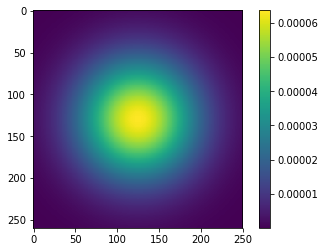

In [6]:
# https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma

#TODO: Get sigma, size right
def generate_gaussian_grid(size_x,size_y,sigma_x=3.,sigma_y=3.):
    x = np.linspace(-int(size_x/2), int(size_x/2), size_x)
    y = np.linspace(-int(size_y/2), int(size_y/2), size_y)

    x, y = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2))))
    #plt.contourf(x, y, z, cmap='Blues')
    #plt.colorbar()
    #plt.show()    
    return z

#print(z.shape)

#plt.contourf(x, y, z, cmap='Blues')
#plt.colorbar()
#plt.show()

gauss = generate_gaussian_grid(250,260,50,50)
plt.imshow(gauss)
plt.colorbar()
print(np.max(gauss))

In [7]:
# https://stackoverflow.com/questions/12141150/from-list-of-integers-get-number-closest-to-a-given-value
def takeClosest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        before = None
        after = None
    elif pos == len(myList):
        before = myList[-1]
        after = None
    else:
        before = myList[pos - 1]
        after = myList[pos]
    
    return before, after

'''
    0 - reject
    1 - accept
    2 - unsure
'''
def check(keys,sd,uni,sam):
    hi = len(keys)
    lo = 0
    
    if hi == 1:
        return 2
    
    if hi == 2:
        if keys[0] < uni and sam > sd.get(keys[0]):
            return 0
            
        if keys[1] > uni and sam < sd.get(keys[1]):
            return 1
        return 2
        
    
    while lo < hi:
        mid = (lo+hi)//2
        mk = keys[mid]
        if mk < uni and sam > sd.get(mk):
            return 0
        if mid < (hi-1):    
            mk2 = keys[mid+1]
            if mk2 > uni and sam < sd.get(mk2):
                return 1
        
        if mk < uni: lo = mid+1
        else: hi = mid
    return 2

In [8]:
class speckle_noise(st.rv_continuous):
    mu = 0.6
    sd = SortedDict([])
    
    def _pdf(self,epsilon):
        b = np.abs(self.mu) * np.cos(epsilon)
        f = (1-np.power(np.abs(self.mu),2))/(2*np.pi)
        g = np.power(1-np.power(b,2),(-3/2))
        h = (b * np.arcsin(b))+((np.pi*b)/2) + np.power(1-np.power(b,2),(1/2))

        return f*g*h
        
    def rvs(self,size):
        res = []
        pdf = self._pdf(0)
        
        self.sd.update([(0,pdf)])
        self.keys = list(self.sd.keys())
        
        while len(res) < size:
            uni = np.random.uniform(0,self.b) # Since the function is mirrored around 0
            sam = np.random.uniform(0,pdf)
            
            c = check(self.keys,self.sd,uni,sam)
            
            if c == 0:
                continue
            if c == 1:
                sign = np.random.randint(2)+1
        
                res.append(uni*((-1)**sign))
                continue
            
            pdf_val = self._pdf(uni)
            if sam < pdf_val:
                sign = np.random.randint(2)+1
        
                res.append(uni*((-1)**sign))
                self.sd.update([(uni,pdf_val)])
                self.keys = list(self.sd.keys())

        return np.array(res)

noise_dist = speckle_noise(a=-math.pi, b=math.pi, name='speckle')
    
def generate_noise(x,y):
    noise = noise_dist.rvs(size=(x*y))
    noise = noise.reshape((x,y))
    
    return noise

(-0.5, 275.5, 275.5, -0.5)

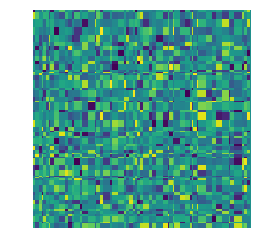

In [9]:
x = 276
y = 276
max_size = 10

def gen_rand_sizes(i):
    sum_i = 0
    list_i = []
    
    while sum_i < (i-1):
        r = random.randint(1,min(max_size,i-(sum_i-1)))
        list_i.append(r)
        sum_i+=r
        
    return list_i

def gen_noise_random_size(x,y):
    x_list = gen_rand_sizes(x)
    y_list = gen_rand_sizes(y)
    
    noise = noise_dist.rvs(size=(len(x_list)*len(y_list)))
    
    noise_mat = np.zeros((x,y))
    
    current_x = 0
    current_y = 0
    
    noise_counter = 0
    
    for block_x in x_list:
        current_y = 0
        for block_y in y_list:
            noise_mat[current_x:current_x+block_x,current_y:current_y+block_y] = noise[noise_counter]
            current_y += block_y
            noise_counter += 1
        current_x += block_x
            
    #noise_mat = sp.ndimage.filters.gaussian_filter(noise_mat,sigma=3)
    
    mean = np.mean(noise_mat)
    sd = np.std(noise_mat)
    
    noise_mat = (noise_mat-mean)/sd
            
    return noise_mat
            
plt.imshow(gen_noise_random_size(x,y))
plt.axis('off')

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

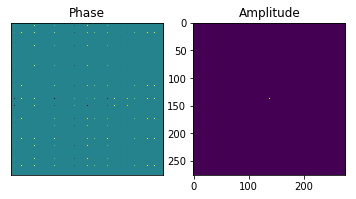

In [10]:
plane = np.ones((x,y))
plane = np.cos(plane) + 1j*np.sin(plane)
fft_plane = np.fft.fftshift(np.fft.fft2(plane))

fig,ax = plt.subplots(1,2)

ax[0].set_title("Phase")
ax[0].imshow(np.angle(fft_plane))
#plt.colorbar()
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].set_title("Amplitude")
bax = ax[1].imshow(np.abs(fft_plane))

fft_plane

-1.3986846624727848e-17
0.9999999999999999


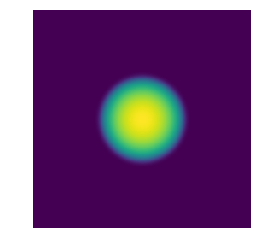

In [11]:
def gen_sphere(x,y,r=50):
    circ = np.zeros((x,y))

    #r = 80*1 # - Hydrogel
    #r = 50*1 # - Water
    #r = 500*1 # - Water
    #r = 90*1 # - OCT Beads
    r2 = np.power(r,2)
    
    pos_x = x/2
    #pos_x = 136
    pos_y = y/2
    #pos_y = 136
    
    for i in range(x):
        x2 = np.power(i-pos_x,2)
        for j in range(y):
            #print(abs_dist(a,b))
            #circ[i][j] = np.cos(max(abs_dist(i,j)/water_x*pi,0)) # np.cos((np.abs(50-i)+np.abs(50-j))/100)
            #circ[i][j] = max(0.0,np.cos((i)/water_x*np.pi))
            circ[i][j] = np.power(max(0,r2-(x2+np.power(j-pos_y,2))),1/2)
            
    circ = sp.ndimage.filters.gaussian_filter(circ,sigma=3)
    
    mean = np.mean(circ)
    sd = np.std(circ)
    
    circ = (circ-mean)/sd
    
    return circ

sphere = gen_sphere(255,255,50)
plt.imshow(sphere)
plt.axis('off')

print(np.mean(sphere))
print(np.std(sphere))

In [23]:
def get_gauss_beam(x,y):
    gauss = generate_gaussian_grid(x,y,50,50)
    sphere = gen_sphere(x,y,50)
    gauss = gauss * (np.cos(sphere) + 1j*np.sin(sphere))
    
    return gauss

In [12]:
class WaveAnimation(animation.TimedAnimation):
    def __init__(self,data):
        fig,ax = plt.subplots(1,2)
        self.ax1 = ax[0]
        self.ax2 = ax[1]
        
        ax[0].set_title("Magnitude")
        ax[1].set_title("Phase")
        
        self.data = data
        self.t = len(data)

        animation.TimedAnimation.__init__(self, fig, interval=500, blit=True)

    def _draw_frame(self, framedata):
        i = framedata-1
        wave_abs = np.abs(self.data[i])
        wave_phase = np.angle(self.data[i])
        
        plt1 = self.ax1.imshow(wave_abs)
        plt2 = self.ax2.imshow(wave_phase)
        self._drawn_artists = [plt1,plt2]

    def new_frame_seq(self):
        return iter(range(self.t))

    def _init_draw(self):
        wave_abs = np.abs(self.data[0])
        wave_phase = np.angle(self.data[0])
        
        plt1 = self.ax1.imshow(wave_abs)
        plt2 = self.ax2.imshow(wave_phase)
        
    def close(self):
        plt.close()

In [75]:
#Test gauss beam propogation
gauss = get_gauss_beam(x,y)
fft_gauss = np.fft.fftshift(np.fft.fft2(gauss))

#fig,ax = plt.subplots(1,2)

imgs = []

for i in range(-40,40,1):
    propogator = get_kernel(wavelength, i, 260, 260, x,y)
    prop = fft_gauss*propogator

    wave = np.fft.ifft2(np.fft.ifftshift(prop))
    #im = ax[0].imshow(np.abs(proped), animated=True)
    #im2 = ax[0].imshow(np.angle(proped), animated=True)
    
    imgs.append(wave)
    
ani = WaveAnimation(imgs)
ani.close()
HTML(ani.to_html5_video())

In [16]:
imgs = []

for f in range(-20000,20000,200):
    mat = np.broadcast_to(range(-int(x/2),int(x/2)+1),(x,y))
    mat_2 = np.broadcast_to(range(-int(y/2),int(y/2)+1),(y,x)).transpose()

    lens = np.exp(-1j*(2*np.pi/wavelength)*((mat**2+mat_2**2)/2/f))
    
    imgs.append(lens)
    
ani = WaveAnimation(imgs)
ani.close()
HTML(ani.to_html5_video())

In [8]:
#Test gauss beam propogation with lens
x = 255
y = 255
f = 5000

gauss = get_gauss_beam(x,y)

mat = np.broadcast_to(range(-int(x/2),int(x/2)+1),(x,y))
mat_2 = np.broadcast_to(range(-int(y/2),int(y/2)+1),(y,x)).transpose()

lens = np.exp(-1j*(2*np.pi/wavelength)*((mat**2+mat_2**2)/2/f))

gauss = gauss*lens

fft_gauss = np.fft.fftshift(np.fft.fft2(gauss))

#fig,ax = plt.subplots(1,2)

imgs = []

for i in range(-40,40,1):
    propogator = get_kernel(wavelength, i, 260, 260, x,y)
    prop = fft_gauss*propogator

    wave = np.fft.ifft2(np.fft.ifftshift(prop))
    #im = ax[0].imshow(np.abs(proped), animated=True)
    #im2 = ax[0].imshow(np.angle(proped), animated=True)
    
    imgs.append(wave)
    
ani = WaveAnimation(imgs)
ani.close()
HTML(ani.to_html5_video())

NameError: name 'get_gauss_beam' is not defined

In [20]:
# Propagate only
x = 255
y = 255
#f = 40 * 1000
wavelength = 0.638

def get_comb(prop_dist,total_dist,f=10000,n = None):
    gauss = get_gauss_geam(x,y)
    if(n is None):
        noise = gen_noise_random_size(x,y)
    else:
        noise = n
    
    noise = sp.ndimage.filters.gaussian_filter(noise,sigma=3)
    noise = (np.cos(noise) + 1j*np.sin(noise))
    
    #print(noise)

    mat = np.broadcast_to(range(-int(x/2),int(x/2)+1),(x,y))
    mat_2 = np.broadcast_to(range(-int(y/2),int(y/2)+1),(y,x)).transpose()

    lens = np.exp(-1j*(2*np.pi/wavelength)*((mat**2+mat_2**2)/2/f))

    gauss = gauss*lens
    
    fft_gauss = np.fft.fftshift(np.fft.fft2(gauss))
    fft_noise = np.fft.fftshift(np.fft.fft2(noise))
    
    propogator = get_kernel(wavelength, prop_dist, x+10, y+10, x,y)
    fft_gauss = fft_gauss*propogator
    
    comb = fft_noise*fft_gauss
    propogator = get_kernel(wavelength, total_dist-prop_dist, x+10, y+10, x,y)
    #comb = comb*propogator

    comb = np.fft.ifft2(np.fft.ifftshift(comb))
    #comb *= lens
    #comb = np.fft.fftshift(np.fft.fft2(comb))
    
    #plt.imshow(np.angle(noise))
    #plt.imshow(np.angle(lens))
    #plt.colorbar()
    
    return comb

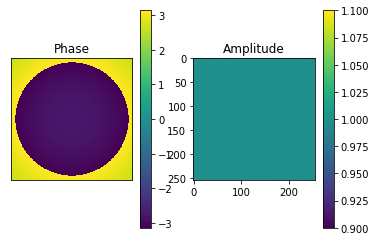

In [14]:
propogator = get_kernel(wavelength, 1, 260, 260, x,y)
fig,ax = plt.subplots(1,2)

ax[0].set_title("Phase")
im0 = ax[0].imshow((np.angle(propogator)))
fig.colorbar(im0,ax=ax[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].set_title("Amplitude")
im1 = ax[1].imshow(np.abs(propogator))
fig.colorbar(im1,ax=ax[1])

0.06757814666735674


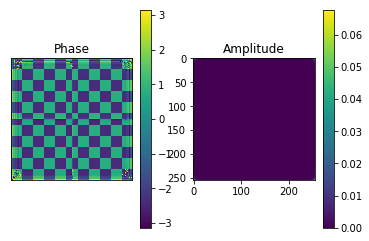

In [19]:
z = 0

comb = get_comb(5000,noise)
propogator = get_kernel(wavelength, 10, 260, 260, x,y)
#propogator = get_kernel(wavelength, 10, 255, 255, x,y)

prop = comb*propogator

wave = np.fft.ifft2(np.fft.ifftshift(prop))

fig,ax = plt.subplots(1,2)

ax[0].set_title("Phase")
im0 = ax[0].imshow((np.angle(wave)))
fig.colorbar(im0,ax=ax[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].set_title("Amplitude")
im1 = ax[1].imshow(np.abs(wave))
fig.colorbar(im1,ax=ax[1])
#fft_noise

print(np.max(np.abs(wave)))

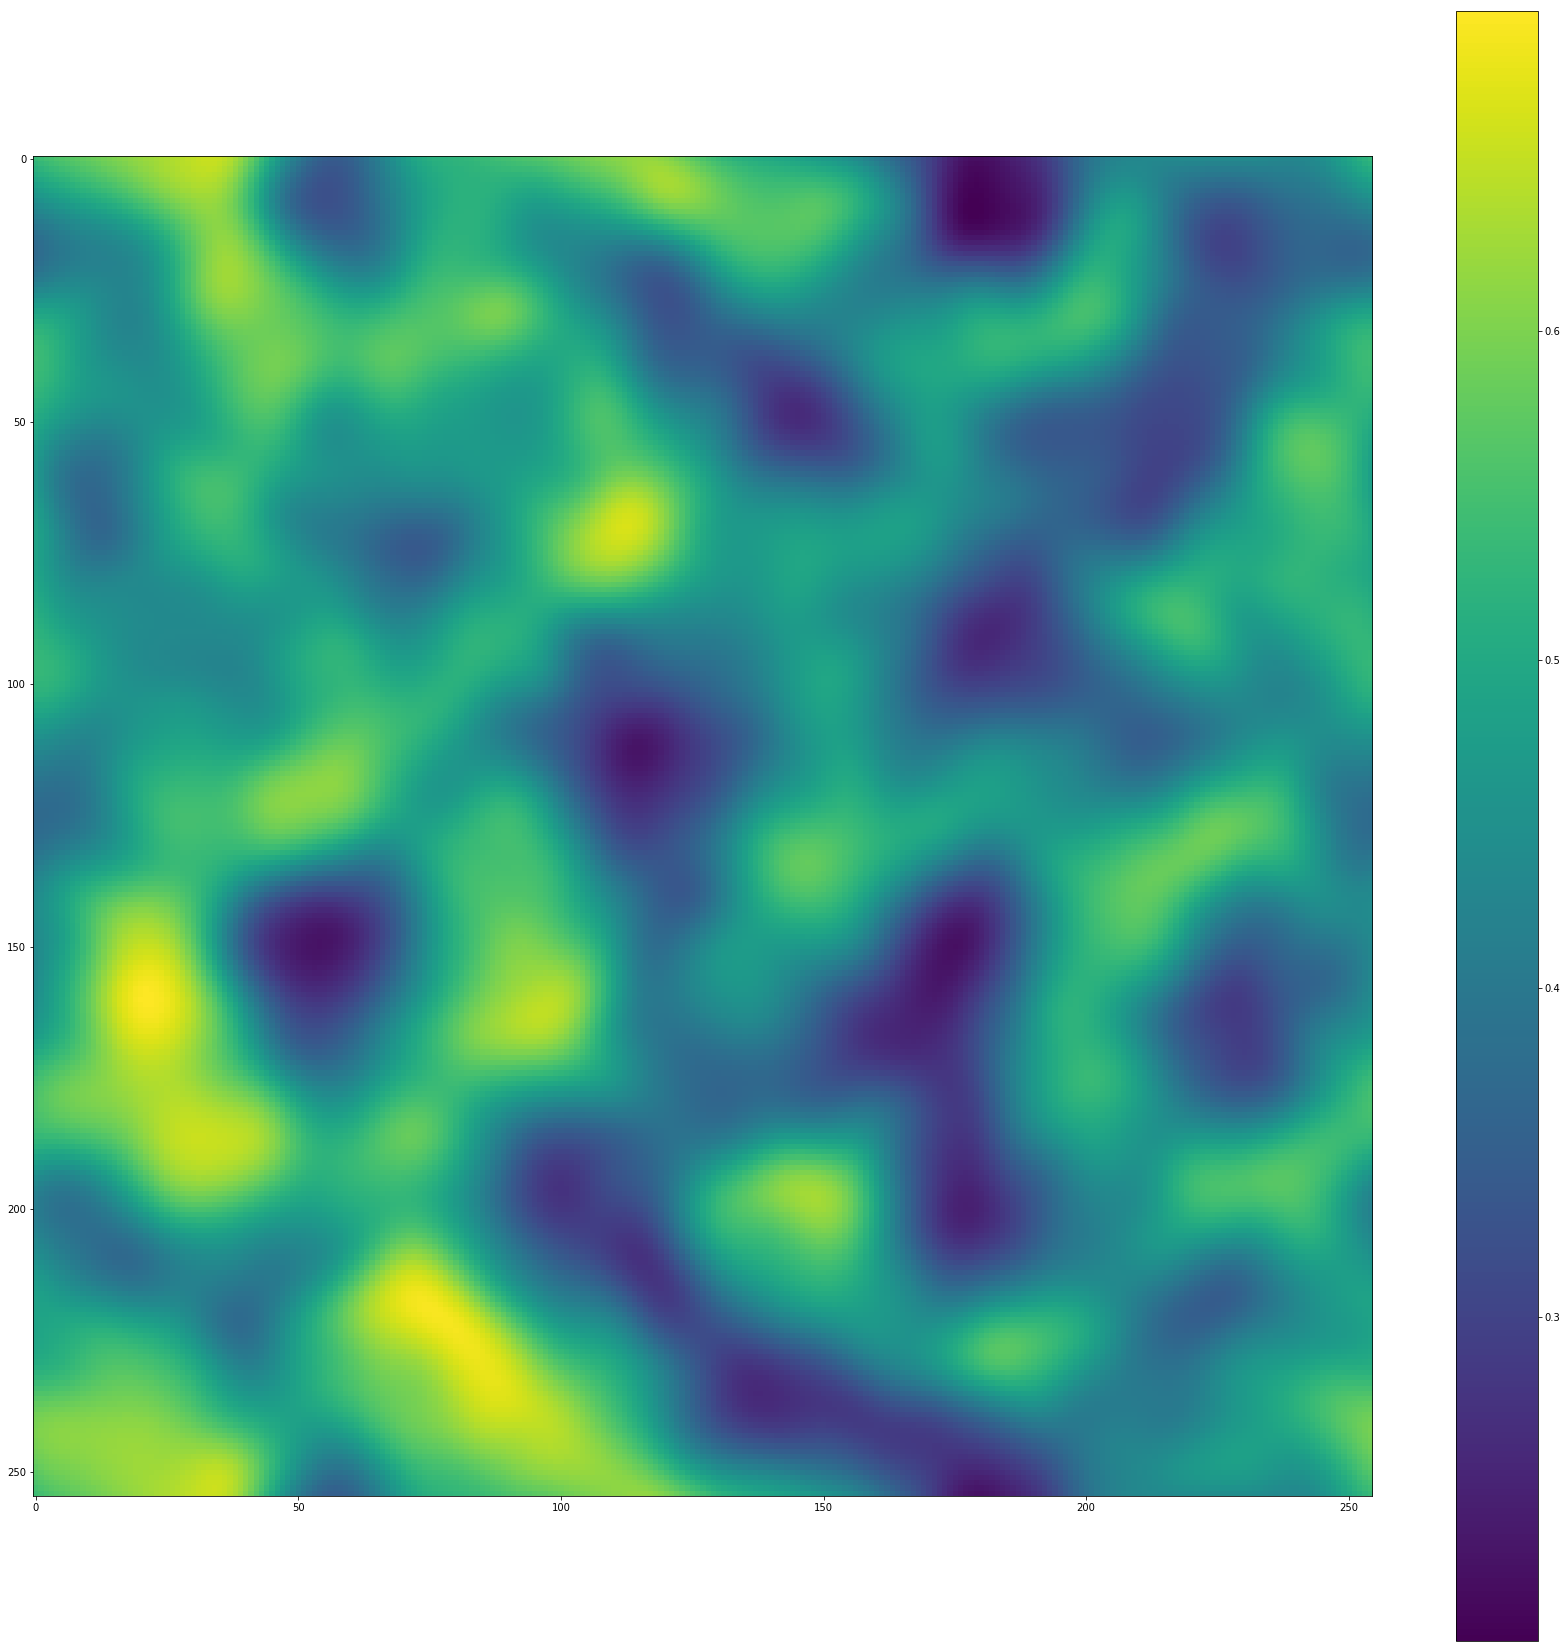

In [18]:
f = 10 * 1000
w=500
prop = get_comb(f,noise)

gauss = generate_gaussian_grid(x,y,50,50)
sphere = gen_sphere(x,y,50)
gauss = gauss * (np.cos(sphere) + 1j*np.sin(sphere))

mat_x = np.broadcast_to(range(-int(x/2),int(x/2)+1),(x,y))
mat_y = np.broadcast_to(range(-int(y/2),int(y/2)+1),(y,x)).transpose()
G1 = np.exp(-(mat_x**2+mat_y**2)/((w/2)**2))*np.exp(-1j*2*mat_x)

G1_mean = np.mean(G1)
G1_std = np.std(G1)

G1 = (G1-G1_mean)/G1_std/100

interf = np.angle(prop)

fig = plt.figure(figsize=(30, 30))
plt.imshow(interf)
plt.colorbar()

In [22]:
#comb = get_comb()
 
fig = plt.figure(figsize=(10, 10))

imgs = []

noise = gen_noise_random_size(x,y)

for i in range(-40,40,5):
    prop_dist = (i+1) * 200
    prop = get_comb(prop_dist,10000,5000,noise)
    
    gauss = generate_gaussian_grid(x,y,50,50)
    sphere = gen_sphere(x,y,50)
    gauss = gauss * (np.cos(sphere) + 1j*np.sin(sphere))
    
    mat_x = np.broadcast_to(range(-int(x/2),int(x/2)+1),(x,y))
    mat_y = np.broadcast_to(range(-int(y/2),int(y/2)+1),(y,x)).transpose()
    G1 = np.exp(-(mat_x**2+mat_y**2)/((w/2)**2))*np.exp(-1j*2*mat_x)
    
    G1_mean = np.mean(G1)
    G1_std = np.std(G1)
    
    G1 = (G1-G1_mean)/G1_std/100
    
    interf = np.abs(prop+G1)
    
    #wave = np.fft.ifft2(np.fft.ifftshift(prop))
    #im = plt.imshow(np.abs(wave), animated=True)
    im = plt.imshow(interf,animated=True)
    
    imgs.append([im])
plt.colorbar()
ani = animation.ArtistAnimation(fig, imgs, interval=1000, blit=True, repeat_delay=1000)
plt.close()

HTML(ani.to_html5_video())

In [48]:
comb = get_comb()
 
fig = plt.figure(figsize=(10, 10))

imgs = []

for i in range(-80,80,5):
    propogator = get_kernel(wavelength, i*1, 260, 260, x,y)
    prop = comb*propogator

    wave = np.fft.ifft2(np.fft.ifftshift(prop))
    im = plt.imshow(np.abs(wave), animated=True)
    
    imgs.append([im])
    
ani = animation.ArtistAnimation(fig, imgs, interval=1000, blit=True, repeat_delay=1000)
plt.close()

HTML(ani.to_html5_video())

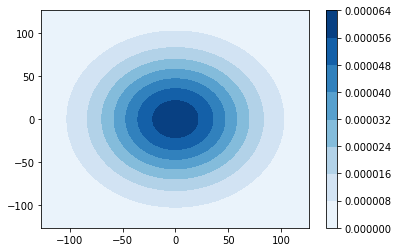

Animation movie is 40712543 bytes, exceeding the limit of 20971520.0. If you're sure you want a large animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB).


In [32]:
# Propagate only
x = 255
y = 255
z = 0

gauss = generate_gaussian_grid(x,y,x/5,y/5)
gauss = np.cos(gauss) + 1j*np.sin(gauss)
noise = gen_noise_random_size(x,y)
noise = sp.ndimage.filters.gaussian_filter(noise,sigma=3)
noise = np.cos(noise) + 1j*np.sin(noise)

fft_gauss = np.fft.fftshift(np.fft.fft2(gauss))
fft_noise = np.fft.fftshift(np.fft.fft2(noise))

comb = fft_noise*fft_gauss

fig = plt.figure(figsize=(10, 10))

imgs = []

for i in range(-200,200,1):
    propogator = get_kernel(wavelength, i, 260, 260, x,y)
    prop = noise*propogator

    wave = np.fft.ifft2(np.fft.ifftshift(prop))
    im = plt.imshow(np.angle(wave), animated=True)
    imgs.append([im])
    
ani = animation.ArtistAnimation(fig, imgs, interval=1000, blit=True, repeat_delay=1000)
plt.close()

HTML(ani.to_html5_video())